# Project 1

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from random import random, seed

from helper_func import *
from linear_reg import *

In [2]:
# Imports for testing
from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import datasets, linear_model
from sklearn import metrics

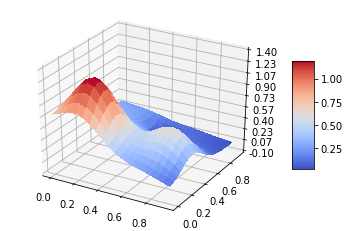

In [3]:
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
plot_3d_franke(x, y, z)

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Fix your x and y values, they should span the whole room. Using linspace and mesh
- [ ] Add confidence intervals for beta by computing variance for each beta

In [4]:
# Define parameters
seed = 3155
np.random.seed(seed)

N = 200
noise_strength = 0.3
p = 5 # up to polynomial of degree 5

In [5]:
# Create data
x, y = create_mesh(N, random_mesh = True, seed = seed)
print(x.shape, y.shape)
z_franke = FrankeFunction(x, y, noise_strength)
z = np.ravel(z_franke)
print(z.shape)
#plot_3d_franke(x, y, z_franke)

(200, 200) (200, 200)
(40000,)


### a) OLS on the Franke function

In [6]:
def confidence_interval(X, z, beta):
    cov = np.var(z)*np.linalg.pinv(X.T.dot(X))
    std_beta = np.sqrt(np.diag(cov))
    CI = 1.96*std_beta

    #plot results
    plt.errorbar(range(len(beta)), beta, CI, fmt="b.", capsize=3, label=r'$\beta_j \pm 1.96 \sigma$')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend()
    plt.xlabel(r'index $j$')
    plt.ylabel(r'$\beta_j$')
    plt.grid()
    plt.show()

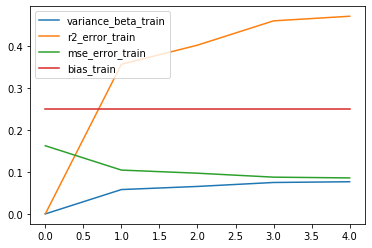

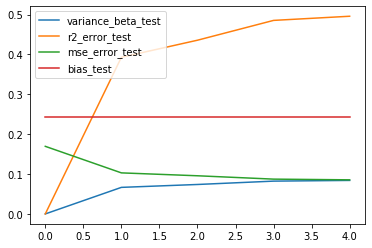

In [7]:
polydegree = np.zeros(p)
r2_error_test = np.zeros(p)
r2_error_train = np.zeros(p)
mse_error_test = np.zeros(p)
mse_error_train = np.zeros(p)
variance_beta = np.zeros(p)
variance_beta_train = np.zeros(p)
variance_beta_test = np.zeros(p)
bias_test = np.zeros(p)
bias_train = np.zeros(p)

for degree in range(p):
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    X_train, X_test, y_train, y_test = create_train_test_data(X, z, debug=False)

    beta_train, beta_optimal_train, r2_error_train[degree], mse_error_train[degree], variance_beta_train[degree], bias_train[degree] = train_test(X_train, y_train)

    beta_test, beta_optimal_test, r2_error_test[degree], mse_error_test[degree], variance_beta_test[degree], bias_test[degree] = train_test(X_test, y_test)

#TODO: Add variance for each beta, should we write it ourselves? Is this good enough?
#print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

values_to_plot_train = {
    "variance_beta_train": variance_beta_train,
    "r2_error_train": r2_error_train,
    "mse_error_train": mse_error_train,
    "bias_train": bias_train,
} 
values_to_plot_test = {
    "variance_beta_test": variance_beta_test,
    "r2_error_test": r2_error_test,
    "mse_error_test": mse_error_test,
    "bias_test": bias_test,
}

plot_test_train(polydegree, values_to_plot_train)
plot_test_train(polydegree, values_to_plot_test)

### Part b): Bias-variance trade-off and resamplng techniques

- [ ] Implement bootstraping, it should get data several times for each polynomial. Just to have a better estimate of errors and such. Not to to train better

In [8]:
# Define parameters
seed = 3155
np.random.seed(seed)

N = 200
noise_strength = 0.3
p = 5 # up to polynomial of degree 5
bootstrap_trials = 2
# Create data
x, y = create_mesh(N, random_mesh = True, seed = seed)
print(x.shape, y.shape)
z_franke = FrankeFunction(x, y, noise_strength)
z = np.ravel(z_franke)
print(z.shape)
#plot_3d_franke(x, y, z_franke)


(200, 200) (200, 200)
(40000,)


Degree:  1
Degree:  2
Degree:  3
Degree:  4
Degree:  5


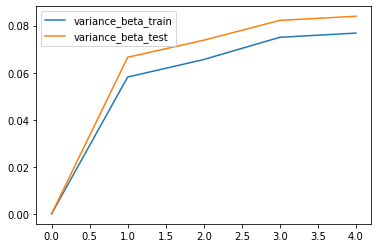

In [9]:
polydegree = np.zeros(p)
r2_error_test = np.zeros(p)
r2_error_train = np.zeros(p)
mse_error_test = np.zeros(p)
mse_error_train = np.zeros(p)
variance_beta = np.zeros(p)
variance_beta_train = np.zeros(p)
variance_beta_test = np.zeros(p)
bias_test = np.zeros(p)
bias_train = np.zeros(p)

for degree in range(p):
    print("Degree: ", degree + 1)
    polydegree[degree] = degree
    X = create_X(x, y, degree, debug = False)
    X_train, X_test, y_train, y_test = create_train_test_data(X, z, debug=False)

    r2_error_train[degree], mse_error_train[degree], variance_beta_train[degree], bias_train[degree] = train_test_bootstrap(X_train, y_train, bootstrap_trials)

    beta_test, beta_optimal_test, r2_error_test[degree], mse_error_test[degree], variance_beta_test[degree], bias_test[degree] = train_test(X_test, y_test)

values_to_plot = {
    "variance_beta_train": variance_beta_train,
    "variance_beta_test": variance_beta_test,
    #"r2_error_train": r2_error_train,
    #"mse_error_train": mse_error_train,
    "bias_train": bias_train,
    #"mse_error_test": mse_error_test,
    "bias_test": bias_test,
} 

plot_test_train(polydegree, values_to_plot)

### c) K-Fold CV

K = 5 
- Randomly partition data K-equally sizes sub samples
- For each fold train other folds and test on that fold, calculate error
- Average out error

#### TODOS:
- [ ] Rewrite K folds as array not reshaping and flattening
- [ ] Why are my results so super different? => might be fixed by a better data in the beginning
- [ ] Run a check on the testing as well, compare results to bootstrapping

In [11]:
k = 5

X_train, X_test, y_train, y_test = train_test_split(create_X(x, y, 8), z, test_size = 0.2, shuffle = False)

X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

# TODO: Without it there are Nan values, is this the correct way to fix this?
X_train[:, 0] = 1
X_test[:, 0] = 1

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

kfold = KFold(n_splits = k)
scores = cross_val_score(model, X, z, scoring='neg_mean_squared_error', cv=kfold)
print("Cross-validated score from sklearn:", np.mean(-scores))

# Create k-folds
X_train = np.reshape(X_train, (k, -1, X_train.shape[1]))
y_train = np.reshape(y_train, (k, -1))

error_train = np.zeros(k)

indices = list(range(0, k))
for fold in range(k):
    # get all the training folds expect the fold index
    last_shape = X_train.shape[-1]
    fold_X_train = X_train[np.delete(indices, fold)].reshape(-1, last_shape)

    fold_Y_train = y_train[np.delete(indices, fold)].flatten()

    # Data will be used to validate
    fold_X_train_validation = X_train[fold].reshape(-1, last_shape)
    fold_Y_train_validation = y_train[fold].flatten()

    beta = np.linalg.inv(fold_X_train.T @ fold_X_train) @ fold_X_train.T @ fold_Y_train

    beta_optimal = fold_X_train_validation @ beta
    error_train[fold] =  MSE(fold_Y_train_validation, beta_optimal)
    
total_error = error_train.mean()
print("Cross-validated score manual: ", total_error)

Cross-validated score from sklearn: 45618.4777541652
Cross-validated score manual:  0.14115890484479948


### Part d): Ridge Regression on the Franke function  with resampling

1. Implement Ridge Regression
2. Preform bootstrap analysis as in b)
3. Preform cross-validation as in c) but now on dependence on $\lambda$
4. Comment on the differences

- [ ] Compute beta using s v d
- [ ] Implement your own svd ?

In [32]:

X_ridge = create_X(x, y, 8)
X_train, X_test, y_train, y_test = train_test_split(X_ridge, z, test_size = 0.2, shuffle = False)

#print(U.shape, s.shape, V.shape, y_train.shape)

X_train_mean = np.mean(X_train, axis = 0)
X_train_std = np.std(X_train, axis = 0)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

# TODO: Without it there are Nan values, is this the correct way to fix this?
X_train[:, 0] = 1
X_test[:, 0] = 1

ridge_lambda = 0.01

U, s, V = np.linalg.svd(X_train, full_matrices = False) # goddamn magic
# TODO: use SVD instead of inv
#beta = np.linalg.inv(X_train.T @ X_train + ridge_lambda * np.identity(X_train.shape[1])) @ X_train.T @ y_train
lambda_inverse = np.diag(1/(s**2 + ridge_lambda))
print(V.shape, lambda_inverse.shape, s.shape, U.T.shape, y_train.shape)
print(lambda_inverse)
beta = V @ lambda_inverse @ s @ U.T @ y_train

#beta_optimal = (1/(1 + ridge_lambda)) * X_train @ beta
print("Train: R2 ", R2(y_train, beta_optimal)) # ~ 1
print("Train: MSE ", MSE(y_train, beta_optimal)) # ~ 0


(45, 45) (45, 45) (45,) (45, 160) (160,)
[[2.16969117e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.15127949e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.43397896e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.99998386e+01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.99999377e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.99999424e+01]]
Train: R2  0.8072955872121694
Train: MSE  0.018783941944036008
